# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [8]:
import pandas as pd
train = pd.read_csv('train.csv')
print(train.shape)

(891, 12)


2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [9]:
#remove useless colums
train = train.drop(columns=['PassengerId', 'Name', 'Ticket'])
train.head()
print(train.shape)

(891, 9)


3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [10]:
#add deck letter column
train['Deck'] = train['Cabin'].str[0]
train = train.drop(columns=['Cabin'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [11]:
# Label encoding with pandas category dtype
for col in ['Sex', 'Deck', 'Embarked', 'Pclass']:
    train[col] = train[col].astype('category')

train.head()
print(train.info())
print(train.shape)
print(train.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
 8   Deck      204 non-null    category
dtypes: category(4), float64(2), int64(3)
memory usage: 39.1 KB
None
(891, 9)
          Survived  Pclass   Sex         Age       SibSp       Parch  \
count   891.000000   891.0   891  714.000000  891.000000  891.000000   
unique         NaN     3.0     2         NaN         NaN         NaN   
top            NaN     3.0  male         NaN         NaN         NaN   
freq           NaN   491.0   577         NaN         NaN         NaN   
mean      0.383838

5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [12]:
# handle missing values
#for coninuous columns, fill with median
for col in ['Age', 'Fare']:
    train[col] = train[col].fillna(train[col].median())
#for categorical columns, fill with mode
for col in ['Embarked', 'Deck']:
    train[col] = train[col].fillna(train[col].mode()[0])
    
print(train.info())
print(train.shape)
print(train.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
 8   Deck      891 non-null    category
dtypes: category(4), float64(2), int64(3)
memory usage: 39.1 KB
None
(891, 9)
          Survived  Pclass   Sex         Age       SibSp       Parch  \
count   891.000000   891.0   891  891.000000  891.000000  891.000000   
unique         NaN     3.0     2         NaN         NaN         NaN   
top            NaN     3.0  male         NaN         NaN         NaN   
freq           NaN   491.0   577         NaN         NaN         NaN   
mean      0.383838

6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [13]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [14]:
# write modified data to csv
train.to_csv('train_modified.csv', index=False)

# write also to json
train.to_json('train_modified.json', orient='records', lines=True)

Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [15]:

for col in train.columns:
    if train[col].dtype.name == 'category':
        print(f'{col} mode: {train[col].mode()[0]}')
    else:
        print(f'{col} median: {train[col].median()}')


Survived median: 0.0
Pclass mode: 3
Sex mode: male
Age median: 28.0
SibSp median: 0.0
Parch median: 0.0
Fare median: 14.4542
Embarked mode: S
Deck mode: C


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [16]:
survivors = train[train['Survived'] == 1]
non_survivors = train[train['Survived'] == 0]

avg_survivor = {}
avg_non_survivor = {}

for col in ['Sex', 'Deck', 'Embarked', 'Pclass']:
    avg_survivor[col] = survivors[col].mode()[0]
    avg_non_survivor[col] = non_survivors[col].mode()[0]

for col in ['Age', 'SibSp', 'Parch', 'Fare']:
    avg_survivor[col] = survivors[col].median()
    avg_non_survivor[col] = non_survivors[col].median()

avg_survivor_series = pd.Series(avg_survivor, name="Average Survivor")
avg_non_survivor_series = pd.Series(avg_non_survivor, name="Average Non-Survivor")

comparison_df = pd.DataFrame([avg_survivor_series, avg_non_survivor_series])
print(comparison_df)

                         Sex Deck Embarked  Pclass   Age  SibSp  Parch  Fare
Average Survivor      female    C        S       1  28.0    0.0    0.0  26.0
Average Non-Survivor    male    C        S       3  28.0    0.0    0.0  10.5



3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

<Figure size 1500x1000 with 0 Axes>

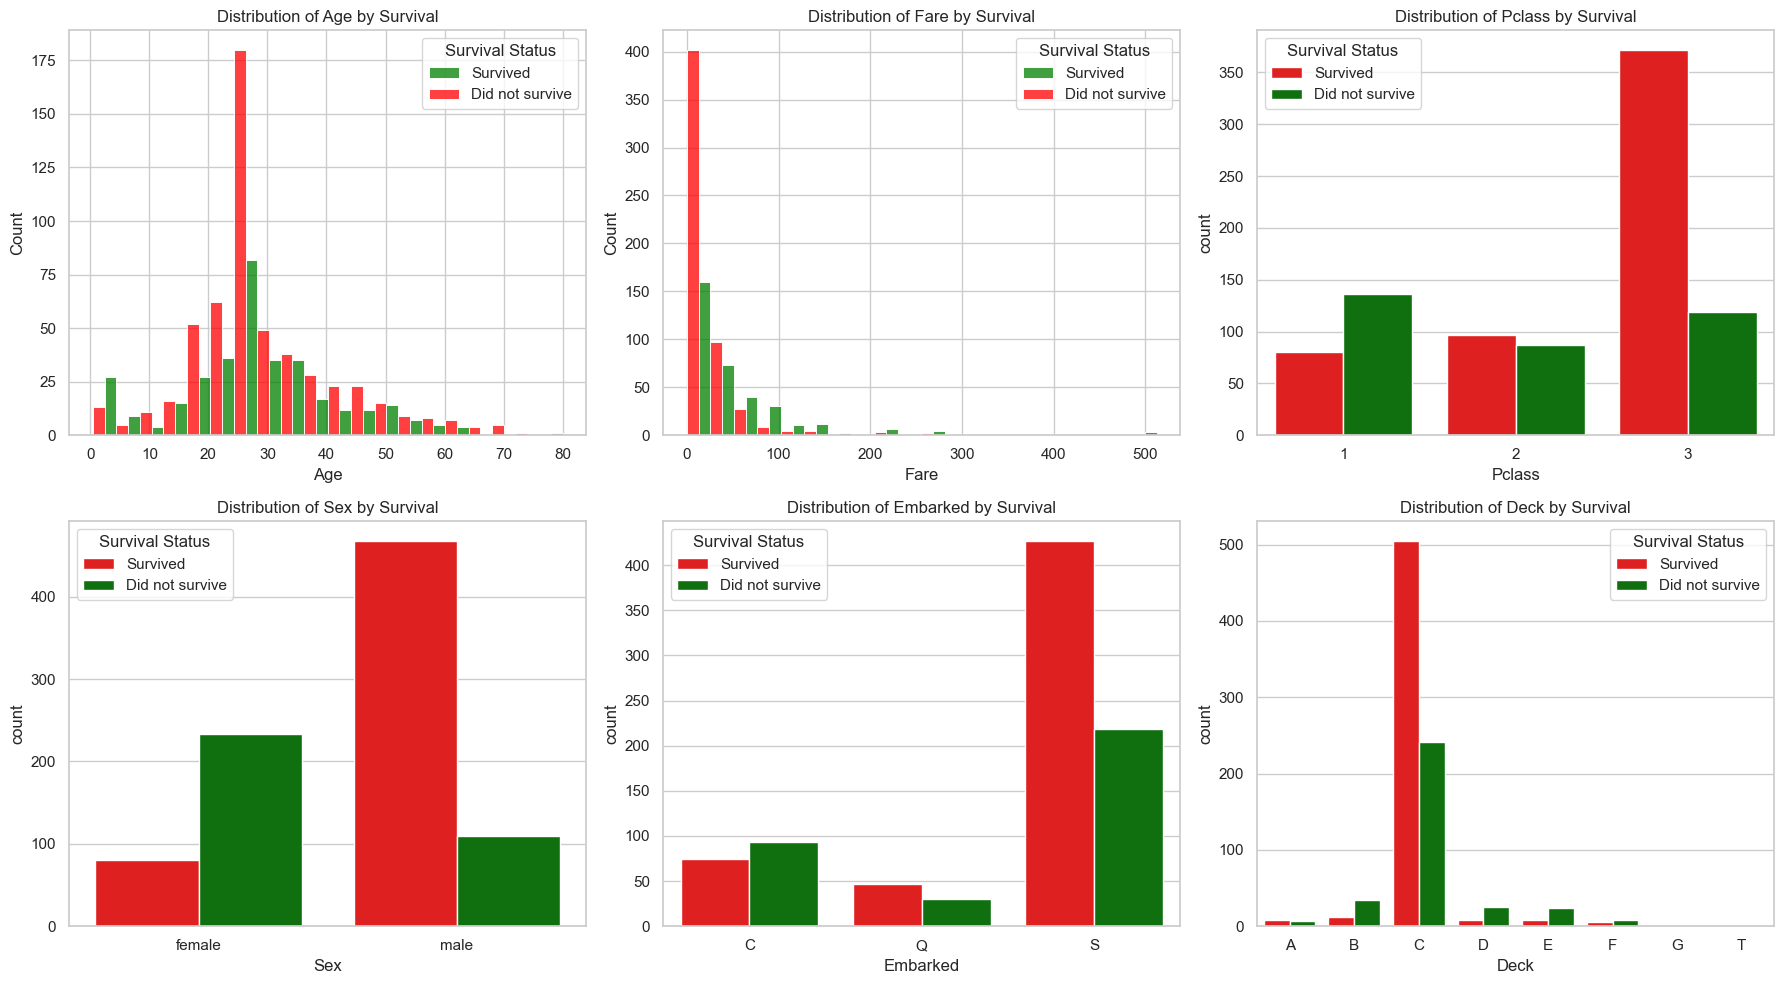


Most typical survivors:
     Survived Pclass     Sex   Age   Fare  similarity_to_survivor
430         1      1    male  28.0  26.55                0.511074
507         1      1    male  28.0  26.55                0.511074
298         1      1    male  28.0  30.50                0.590606
607         1      1    male  27.0  30.50                0.618808
596         1      2  female  28.0  33.00                0.640943

Most typical non-survivors:
     Survived Pclass   Sex   Age    Fare  similarity_to_non_survivor
200         0      3  male  28.0  9.5000                    0.020135
355         0      3  male  28.0  9.5000                    0.020135
868         0      3  male  28.0  9.5000                    0.020135
158         0      3  male  28.0  8.6625                    0.036997
45          0      3  male  28.0  8.0500                    0.049330

Survivors most similar to non-survivor profile:
     Survived Pclass   Sex   Age    Fare  similarity_to_non_survivor
444         1     

In [19]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Create a mapping for survival status
survival_labels = {0: "Did not survive", 1: "Survived"}
# Use a color mapping dictionary for consistency
survival_color_map = {1: "green", 0: "red"}  # Survived=1 gets green, Did not survive=0 gets red

# 1. Visualize distributions of key variables between survivors and non-survivors
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

numerical_cols = ['Age', 'Fare']
for i, col in enumerate(numerical_cols):
    sns.histplot(data=train, x=col, hue='Survived', multiple='dodge', 
                bins=20, ax=axes[i], 
                palette=survival_color_map)
    # Replace legend labels
    new_labels = [survival_labels[1], survival_labels[0]]
    axes[i].legend(title='Survival Status', labels=new_labels)
    axes[i].set_title(f'Distribution of {col} by Survival')

# Display categorical variables
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Deck']
for i, col in enumerate(categorical_cols):
    sns.countplot(data=train, x=col, hue='Survived', ax=axes[i+2],
                 palette=survival_color_map)
    # Replace legend labels
    new_labels = [survival_labels[1], survival_labels[0]]
    axes[i+2].legend(title='Survival Status', labels=new_labels)
    axes[i+2].set_title(f'Distribution of {col} by Survival')

plt.tight_layout()
plt.show()

# 2. Find passengers most similar to the average profiles
# Normalize numerical features for fair comparison
scaler = StandardScaler()
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
train_scaled = train.copy()
train_scaled[numerical_features] = scaler.fit_transform(train[numerical_features])

# Create scaled average profiles
avg_survivor_scaled = train_scaled[train_scaled['Survived'] == 1][numerical_features].median().to_dict()
avg_non_survivor_scaled = train_scaled[train_scaled['Survived'] == 0][numerical_features].median().to_dict()

# Add categorical features
for col in ['Sex', 'Deck', 'Embarked', 'Pclass']:
    avg_survivor_scaled[col] = avg_survivor[col]
    avg_non_survivor_scaled[col] = avg_non_survivor[col]

# Function to calculate similarity score (lower = more similar)
def calculate_similarity(row, avg_profile):
    # Calculate distance for numerical features
    num_distance = euclidean(
        [row[feat] for feat in numerical_features],
        [avg_profile[feat] for feat in numerical_features]
    )
    
    # Calculate categorical match (0 if match, 1 if no match)
    cat_distance = sum(row[col] != avg_profile[col] for col in ['Sex', 'Deck', 'Embarked', 'Pclass'])
    
    # Combined distance (weighted)
    return num_distance + cat_distance * 0.5

# Calculate similarities for all passengers
train_scaled['similarity_to_survivor'] = train_scaled.apply(
    lambda row: calculate_similarity(row, avg_survivor_scaled), axis=1)
train_scaled['similarity_to_non_survivor'] = train_scaled.apply(
    lambda row: calculate_similarity(row, avg_non_survivor_scaled), axis=1)

# Find most representative survivors and non-survivors
most_typical_survivors_idx = train_scaled[train_scaled['Survived'] == 1].nsmallest(5, 'similarity_to_survivor').index
most_typical_non_survivors_idx = train_scaled[train_scaled['Survived'] == 0].nsmallest(5, 'similarity_to_non_survivor').index

# Find anomalies (survivors similar to non-survivor profile and vice versa)
survivor_anomalies_idx = train_scaled[train_scaled['Survived'] == 1].nsmallest(5, 'similarity_to_non_survivor').index
non_survivor_anomalies_idx = train_scaled[train_scaled['Survived'] == 0].nsmallest(5, 'similarity_to_survivor').index

# Display results using original values from train dataframe
print("\nMost typical survivors:")
most_typical_survivors_display = train.loc[most_typical_survivors_idx, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
most_typical_survivors_display['similarity_to_survivor'] = train_scaled.loc[most_typical_survivors_idx, 'similarity_to_survivor']
print(most_typical_survivors_display)

print("\nMost typical non-survivors:")
most_typical_non_survivors_display = train.loc[most_typical_non_survivors_idx, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
most_typical_non_survivors_display['similarity_to_non_survivor'] = train_scaled.loc[most_typical_non_survivors_idx, 'similarity_to_non_survivor']
print(most_typical_non_survivors_display)

print("\nSurvivors most similar to non-survivor profile:")
survivor_anomalies_display = train.loc[survivor_anomalies_idx, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
survivor_anomalies_display['similarity_to_non_survivor'] = train_scaled.loc[survivor_anomalies_idx, 'similarity_to_non_survivor']
print(survivor_anomalies_display)

print("\nNon-survivors most similar to survivor profile:")
non_survivor_anomalies_display = train.loc[non_survivor_anomalies_idx, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
non_survivor_anomalies_display['similarity_to_survivor'] = train_scaled.loc[non_survivor_anomalies_idx, 'similarity_to_survivor']
print(non_survivor_anomalies_display)

4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

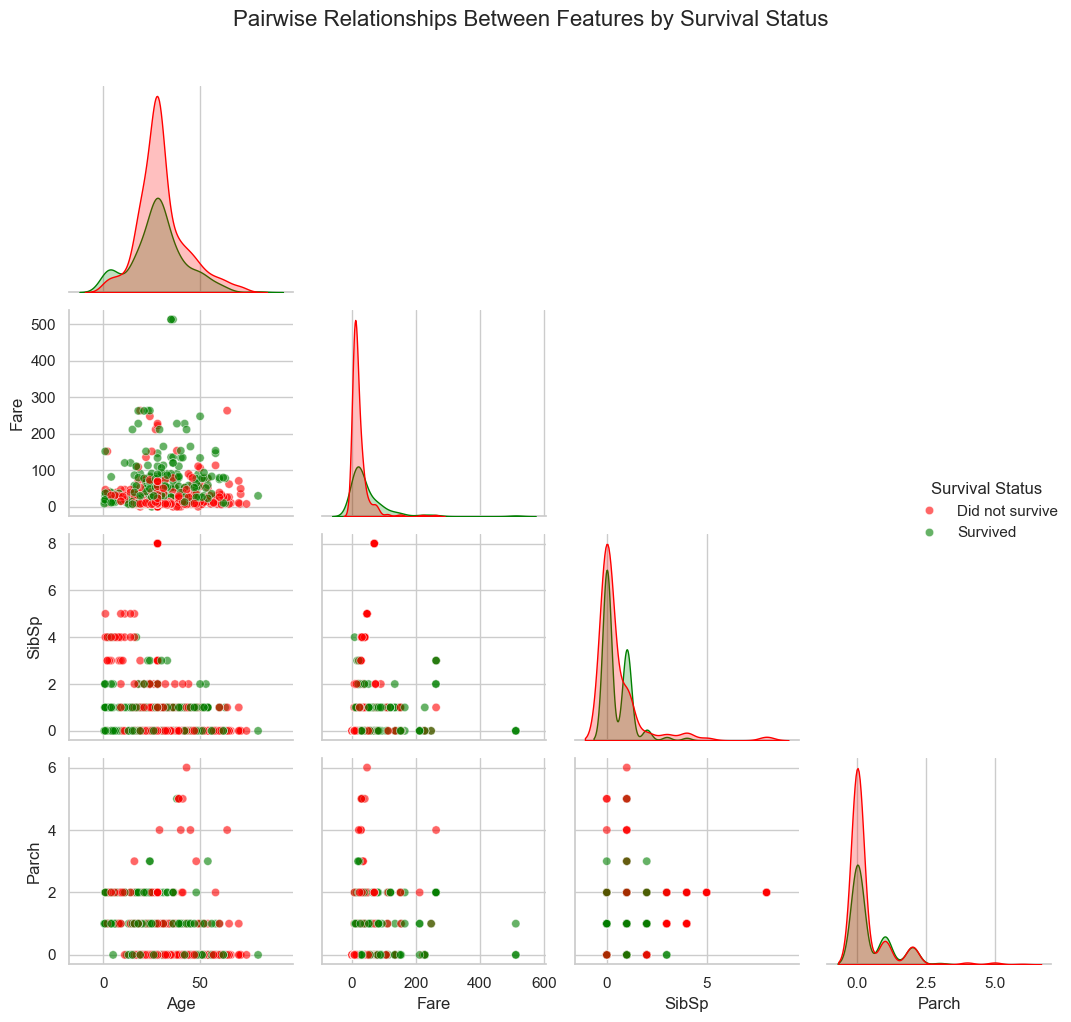

In [20]:

plot_columns = ['Survived', 'Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch']

g = sns.pairplot(
    train[plot_columns], 
    hue='Survived', 
    palette=survival_color_map,
    plot_kws={'alpha': 0.6},

    height=2.5,       
    corner=True
)


g.fig.suptitle('Pairwise Relationships Between Features by Survival Status', y=1.02, fontsize=16)


g._legend.set_title('Survival Status')
new_labels = ['Did not survive','Survived']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.tight_layout()
plt.show()

5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

The imputation of most common and mean values will make the distributions of the variables more concentrated around these values. This can be seen in the pairwise plots as a higher density of points around these values. This may lead to an underestimation of the variability in the data.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [21]:
import re
from collections import Counter
import os

pos_file_path = os.path.join('..', 'pos.txt')
neg_file_path = os.path.join('..', 'neg.txt')

def clean_and_tokenize(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Split into words and remove empty strings
    words = [word for word in text.split() if word]
    return words

with open(pos_file_path, 'r', encoding='utf-8') as f:
    pos_text = f.read()

with open(neg_file_path, 'r', encoding='utf-8') as f:
    neg_text = f.read()

# Tokenize and clean the text
pos_words = clean_and_tokenize(pos_text)
neg_words = clean_and_tokenize(neg_text)

# Count word frequencies
pos_word_counts = Counter(pos_words)
neg_word_counts = Counter(neg_words)

print(f"\nTotal words in positive reviews: {len(pos_words)}")
print(f"Unique words in positive reviews: {len(pos_word_counts)}")
print(f"Total words in negative reviews: {len(neg_words)}")
print(f"Unique words in negative reviews: {len(neg_word_counts)}")

# Get most common words
n_top_words = 20
print(f"\nTop {n_top_words} most common words in POSITIVE reviews:")
print("-" * 50)
for word, count in pos_word_counts.most_common(n_top_words):
    print(f"{word:15} {count:6d}")

print(f"\nTop {n_top_words} most common words in NEGATIVE reviews:")
print("-" * 50)
for word, count in neg_word_counts.most_common(n_top_words):
    print(f"{word:15} {count:6d}")

# Compare common words between positive and negative
print(f"\nComparison of word frequencies:")
print("-" * 60)
print(f"{'Word':15} {'Positive':>10} {'Negative':>10} {'Ratio (P/N)':>12}")
print("-" * 60)

# Get union of top words from both categories
top_pos_words = set([word for word, _ in pos_word_counts.most_common(15)])
top_neg_words = set([word for word, _ in neg_word_counts.most_common(15)])
common_top_words = top_pos_words.union(top_neg_words)

for word in sorted(common_top_words):
    pos_count = pos_word_counts.get(word, 0)
    neg_count = neg_word_counts.get(word, 0)
    if neg_count > 0:
        ratio = pos_count / neg_count
    else:
        ratio = float('inf') if pos_count > 0 else 0
    print(f"{word:15} {pos_count:10d} {neg_count:10d} {ratio:12.2f}")


Total words in positive reviews: 22031795
Unique words in positive reviews: 171854
Total words in negative reviews: 3019780
Unique words in negative reviews: 49073

Top 20 most common words in POSITIVE reviews:
--------------------------------------------------
great           435943
work            427790
use             345250
good            291461
fit             273537
instal          229416
product         210098
look            181414
just            180428
like            175727
easi            162868
light           147339
car             147225
price           144915
need            136524
perfect         124435
time            123980
replac          122262
qualiti         119733
nice            119319

Top 20 most common words in NEGATIVE reviews:
--------------------------------------------------
work             39998
use              37248
fit              31299
product          24395
just             23582
light            22916
like             20686
time             1

### Analysis of Most Common Words

**Key Observations:**

1. **General vs. Sentiment-Specific Terms**: Most of the common words are general terms related to the nature of the data (product reviews). Words like "work", "use", "fit", "product", "install", "car", "light" are functional/descriptive terms that don't inherently indicate positive or negative sentiment.

2. **Clear Sentiment Indicators**: Some words do show clear sentiment patterns:
   - **Positive indicators**: "great" (ratio 46.97), "good" (ratio 16.85), "easy" (ratio 44.09), "perfect", "nice"
   - **Negative indicators**: "don't", "didn't", "return" (appears much more in negative reviews)

3. **Frequency Ratios**: The ratio column (Positive/Negative) reveals interesting patterns:
   - Words with high ratios (>20) like "great", "easy", "price" are strong positive sentiment indicators
   - Words with low ratios (<5) like "buy", "did", "don't" appear more frequently in negative reviews

4. **Data Imbalance**: There are significantly more positive reviews (22M words) than negative reviews (3M words), which affects the raw counts but the ratios help normalize this.

**Conclusion**: While the most common words tend to be general product-related terms, examining the frequency ratios between positive and negative reviews reveals clear sentiment patterns. Words like "great", "easy", and "perfect" are strong positive indicators, while words like "don't", "didn't", and "return" are associated with negative sentiment.

Words most characteristic of POSITIVE sentiment:
Word              Pos Freq   Neg Freq      Ratio
------------------------------------------------------------
perfect               5.65       0.53      10.64
perfectli             3.08       0.41       7.55
great                19.79       3.07       6.44
easi                  7.39       1.22       6.04
love                  2.92       0.49       5.92

Words most characteristic of NEGATIVE sentiment:
Word              Pos Freq   Neg Freq      Ratio
------------------------------------------------------------
return                0.37       5.04       0.07
month                 1.36       4.05       0.34
money                 1.29       3.61       0.36
tri                   2.06       4.95       0.42
didnt                 1.81       4.32       0.42
did                   3.06       6.11       0.50
bulb                  2.28       4.14       0.55
dont                  3.49       5.68       0.62
doe                   3.02       4.70       

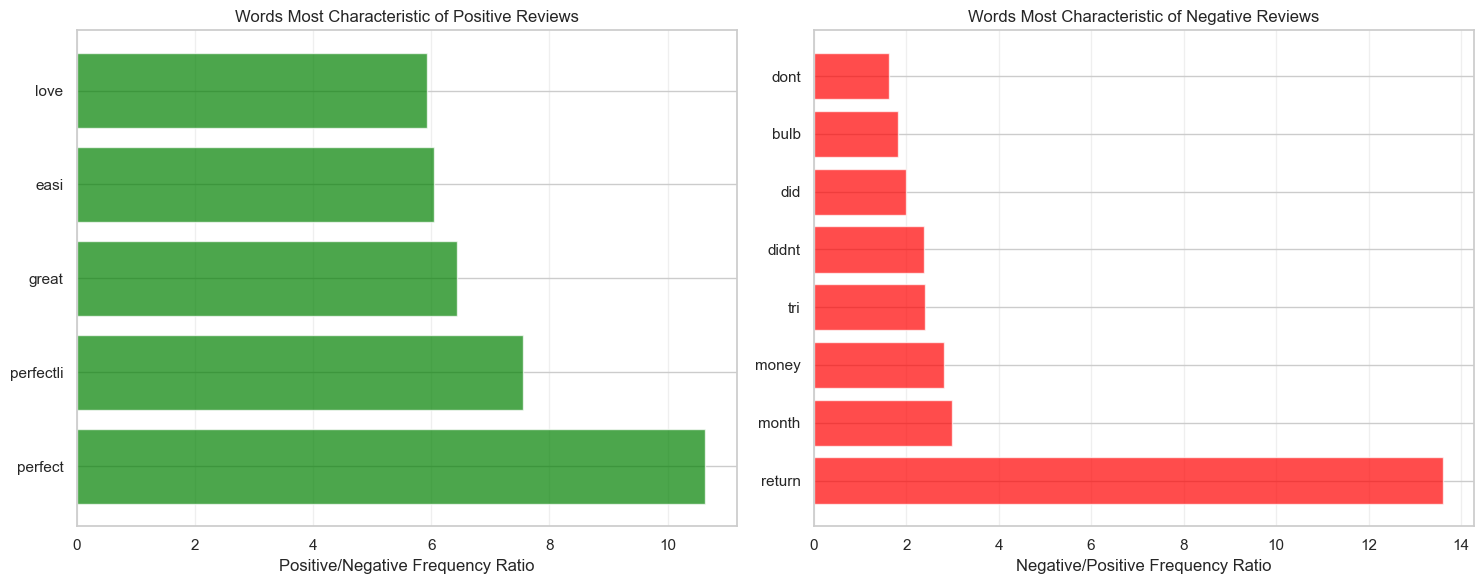

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate relative frequencies (normalize by total words in each category)
total_pos_words = len(pos_words)
total_neg_words = len(neg_words)

# Find words that are particularly characteristic of each sentiment
sentiment_words = []
sentiment_scores = []
word_labels = []

# Words that appear much more in positive reviews (high positive/negative ratio)
positive_characteristic = []
negative_characteristic = []

for word, pos_count in pos_word_counts.most_common(50):
    neg_count = neg_word_counts.get(word, 0)
    
    # Calculate normalized frequencies
    pos_freq = pos_count / total_pos_words * 1000  # per 1000 words
    neg_freq = neg_count / total_neg_words * 1000
    
    # Skip very common function words that don't indicate sentiment
    if word in ['the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by']:
        continue
    
    if pos_freq > 0.1 and neg_freq > 0.05:  # Only consider reasonably frequent words
        ratio = pos_freq / neg_freq if neg_freq > 0 else float('inf')
        if ratio > 5:  # Much more positive
            positive_characteristic.append((word, pos_freq, neg_freq, ratio))
        elif ratio < 0.5:  # Much more negative  
            negative_characteristic.append((word, pos_freq, neg_freq, ratio))

for word, neg_count in neg_word_counts.most_common(30):
    pos_count = pos_word_counts.get(word, 0)
    
    pos_freq = pos_count / total_pos_words * 1000
    neg_freq = neg_count / total_neg_words * 1000
    
    if word in ['the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by']:
        continue
        
    if neg_freq > 0.1 and pos_freq > 0.05:
        ratio = pos_freq / neg_freq if neg_freq > 0 else float('inf')
        if ratio < 0.8 and word not in [item[0] for item in negative_characteristic]:
            negative_characteristic.append((word, pos_freq, neg_freq, ratio))

positive_characteristic.sort(key=lambda x: x[3], reverse=True)
negative_characteristic.sort(key=lambda x: x[3])

print("Words most characteristic of POSITIVE sentiment:")
print("=" * 60)
print(f"{'Word':15} {'Pos Freq':>10} {'Neg Freq':>10} {'Ratio':>10}")
print("-" * 60)
for word, pos_freq, neg_freq, ratio in positive_characteristic[:10]:
    print(f"{word:15} {pos_freq:10.2f} {neg_freq:10.2f} {ratio:10.2f}")

print("\nWords most characteristic of NEGATIVE sentiment:")
print("=" * 60)
print(f"{'Word':15} {'Pos Freq':>10} {'Neg Freq':>10} {'Ratio':>10}")
print("-" * 60)
for word, pos_freq, neg_freq, ratio in negative_characteristic[:10]:
    print(f"{word:15} {pos_freq:10.2f} {neg_freq:10.2f} {ratio:10.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot positive characteristic words
if positive_characteristic:
    pos_words_plot = [item[0] for item in positive_characteristic[:8]]
    pos_ratios = [item[3] for item in positive_characteristic[:8]]
    
    ax1.barh(pos_words_plot, pos_ratios, color='green', alpha=0.7)
    ax1.set_xlabel('Positive/Negative Frequency Ratio')
    ax1.set_title('Words Most Characteristic of Positive Reviews')
    ax1.grid(axis='x', alpha=0.3)

# Plot negative characteristic words  
if negative_characteristic:
    neg_words_plot = [item[0] for item in negative_characteristic[:8]]
    neg_ratios = [1/item[3] for item in negative_characteristic[:8]]  # Invert ratio for clarity
    
    ax2.barh(neg_words_plot, neg_ratios, color='red', alpha=0.7)
    ax2.set_xlabel('Negative/Positive Frequency Ratio')
    ax2.set_title('Words Most Characteristic of Negative Reviews')
    ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import os

pos_file_path = os.path.join('..', 'pos.txt')
neg_file_path = os.path.join('..', 'neg.txt')

with open(pos_file_path, 'r', encoding='utf-8') as f:
    pos_text = f.read()

with open(neg_file_path, 'r', encoding='utf-8') as f:
    neg_text = f.read()

documents = [pos_text, neg_text]
doc_labels = ['positive', 'negative']

tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',  # Remove common English stop words
    lowercase=True,
    min_df=1,  # Word must appear in at least 1 document
    max_df=1.0,  # Allow words that appear in all documents
    ngram_range=(1, 1),  # Use only single words (unigrams)
    token_pattern=r'[a-zA-Z]{3,}'  # Only alphabetic tokens with at least 3 characters
)

tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

tfidf_dense = tfidf_matrix.toarray()

print(f"TF-IDF matrix shape: {tfidf_dense.shape}")
print(f"Number of documents: {tfidf_dense.shape[0]}")
print(f"Number of unique words (features): {tfidf_dense.shape[1]}")

feature_names = tfidf_vectorizer.get_feature_names_out()


print(f"\nTF-IDF score statistics:")
print(f"Positive reviews - Mean: {tfidf_dense[0].mean():.6f}, Max: {tfidf_dense[0].max():.6f}")
print(f"Negative reviews - Mean: {tfidf_dense[1].mean():.6f}, Max: {tfidf_dense[1].max():.6f}")

pos_nonzero = np.count_nonzero(tfidf_dense[0])
neg_nonzero = np.count_nonzero(tfidf_dense[1])
print(f"\nWords with non-zero TF-IDF scores:")
print(f"Positive reviews: {pos_nonzero}")
print(f"Negative reviews: {neg_nonzero}")

print(f"\nExample of the 2x{tfidf_dense.shape[1]} TF-IDF matrix:")
print(f"Matrix shape: {tfidf_dense.shape}")
print(f"Row 0 (positive) sample values: {tfidf_dense[0, :5]}")
print(f"Row 1 (negative) sample values: {tfidf_dense[1, :5]}")

TF-IDF matrix shape: (2, 194413)
Number of documents: 2
Number of unique words (features): 194413

TF-IDF score statistics:
Positive reviews - Mean: 0.000093, Max: 0.368572
Negative reviews - Mean: 0.000114, Max: 0.304575

Words with non-zero TF-IDF scores:
Positive reviews: 174839
Negative reviews: 49111

Example of the 2x194413 TF-IDF matrix:
Matrix shape: (2, 194413)
Row 0 (positive) sample values: [1.25464544e-03 2.13884683e-04 1.39025044e-04 5.46594190e-05
 4.63416813e-05]
Row 1 (negative) sample values: [0.00038835 0.         0.         0.         0.        ]


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [24]:
n_top_words = 20

# For positive reviews (document 0)
pos_tfidf_scores = tfidf_dense[0]
pos_top_indices = np.argsort(pos_tfidf_scores)[::-1][:n_top_words]
pos_top_words = [(feature_names[i], pos_tfidf_scores[i]) for i in pos_top_indices]

# For negative reviews (document 1)
neg_tfidf_scores = tfidf_dense[1]
neg_top_indices = np.argsort(neg_tfidf_scores)[::-1][:n_top_words]
neg_top_words = [(feature_names[i], neg_tfidf_scores[i]) for i in neg_top_indices]

print("=" * 80)
print("COMPARISON: MOST COMMON WORDS vs HIGHEST TF-IDF WORDS")
print("=" * 80)

print(f"\nTop {n_top_words} words with HIGHEST TF-IDF scores in POSITIVE reviews:")
print("-" * 60)
print(f"{'Word':20} {'TF-IDF Score':>15}")
print("-" * 60)
for word, score in pos_top_words:
    print(f"{word:20} {score:15.6f}")

print(f"\nTop {n_top_words} words with HIGHEST TF-IDF scores in NEGATIVE reviews:")
print("-" * 60)
print(f"{'Word':20} {'TF-IDF Score':>15}")
print("-" * 60)
for word, score in neg_top_words:
    print(f"{word:20} {score:15.6f}")

# Let's also check which words appear only in positive vs only in negative
pos_only_words = []
neg_only_words = []

for i, word in enumerate(feature_names):
    pos_score = tfidf_dense[0, i]
    neg_score = tfidf_dense[1, i]
    
    if pos_score > 0 and neg_score == 0:
        pos_only_words.append((word, pos_score))
    elif neg_score > 0 and pos_score == 0:
        neg_only_words.append((word, neg_score))

pos_only_words.sort(key=lambda x: x[1], reverse=True)
neg_only_words.sort(key=lambda x: x[1], reverse=True)

print(f"\nWords that appear ONLY in POSITIVE reviews (top 10):")
print("-" * 60)
print(f"{'Word':20} {'TF-IDF Score':>15}")
print("-" * 60)
for word, score in pos_only_words[:10]:
    print(f"{word:20} {score:15.6f}")

print(f"\nWords that appear ONLY in NEGATIVE reviews (top 10):")
print("-" * 60)
print(f"{'Word':20} {'TF-IDF Score':>15}")
print("-" * 60)
for word, score in neg_only_words[:10]:
    print(f"{word:20} {score:15.6f}")

print(f"\nTotal words appearing only in positive reviews: {len(pos_only_words)}")
print(f"Total words appearing only in negative reviews: {len(neg_only_words)}")

total_words = len(feature_names)
shared_words = total_words - len(pos_only_words) - len(neg_only_words)

print(f"\nVocabulary Statistics:")
print(f"Total unique words: {total_words}")
print(f"Words in both positive and negative: {shared_words}")
print(f"Words only in positive: {len(pos_only_words)}")
print(f"Words only in negative: {len(neg_only_words)}")
print(f"Vocabulary overlap: {shared_words/total_words:.1%}")

COMPARISON: MOST COMMON WORDS vs HIGHEST TF-IDF WORDS

Top 20 words with HIGHEST TF-IDF scores in POSITIVE reviews:
------------------------------------------------------------
Word                    TF-IDF Score
------------------------------------------------------------
great                       0.368572
work                        0.361689
use                         0.291891
good                        0.246419
fit                         0.231267
instal                      0.193965
product                     0.177635
look                        0.153380
just                        0.152543
like                        0.148572
easi                        0.137698
light                       0.124573
car                         0.124480
price                       0.122522
need                        0.115424
perfect                     0.105207
time                        0.104822
replac                      0.103371
qualiti                     0.101228
nice                  

4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

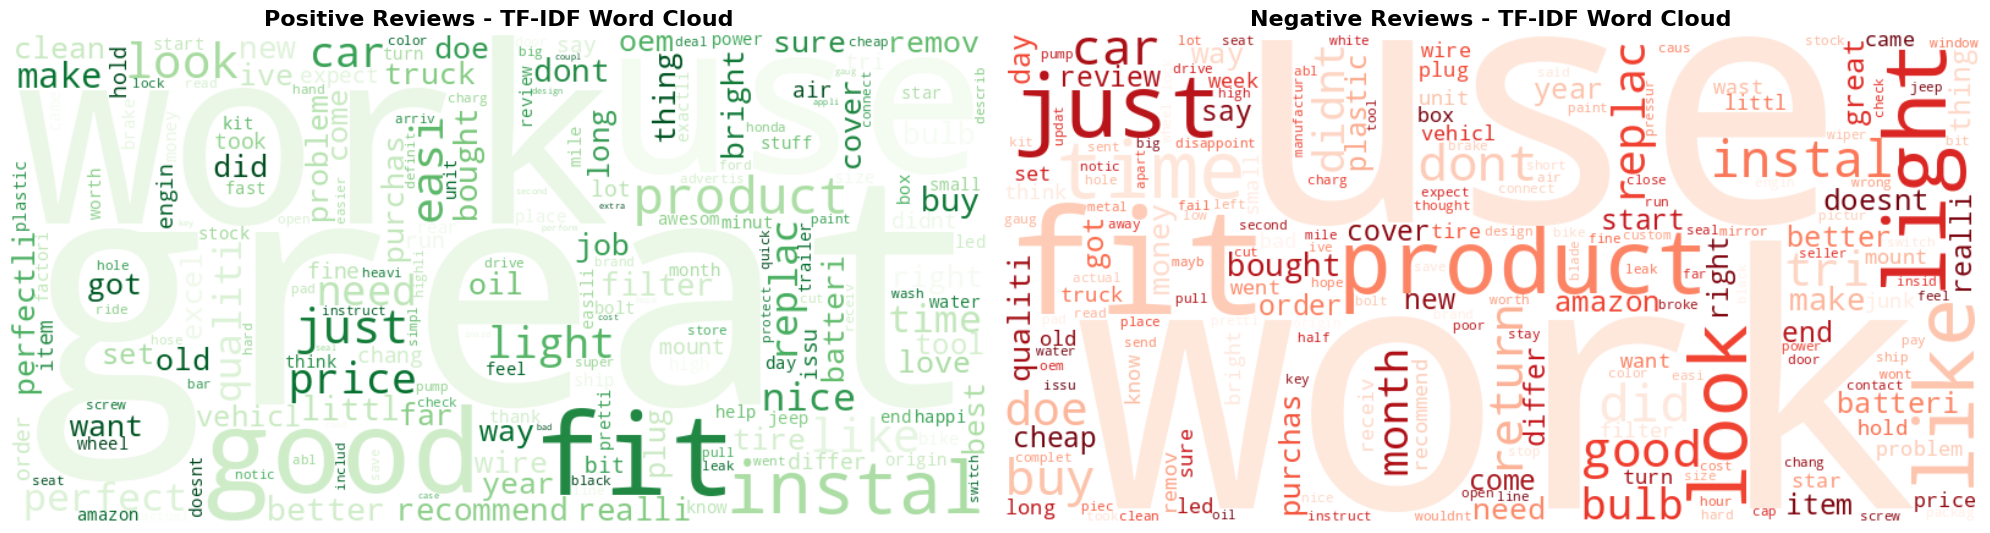

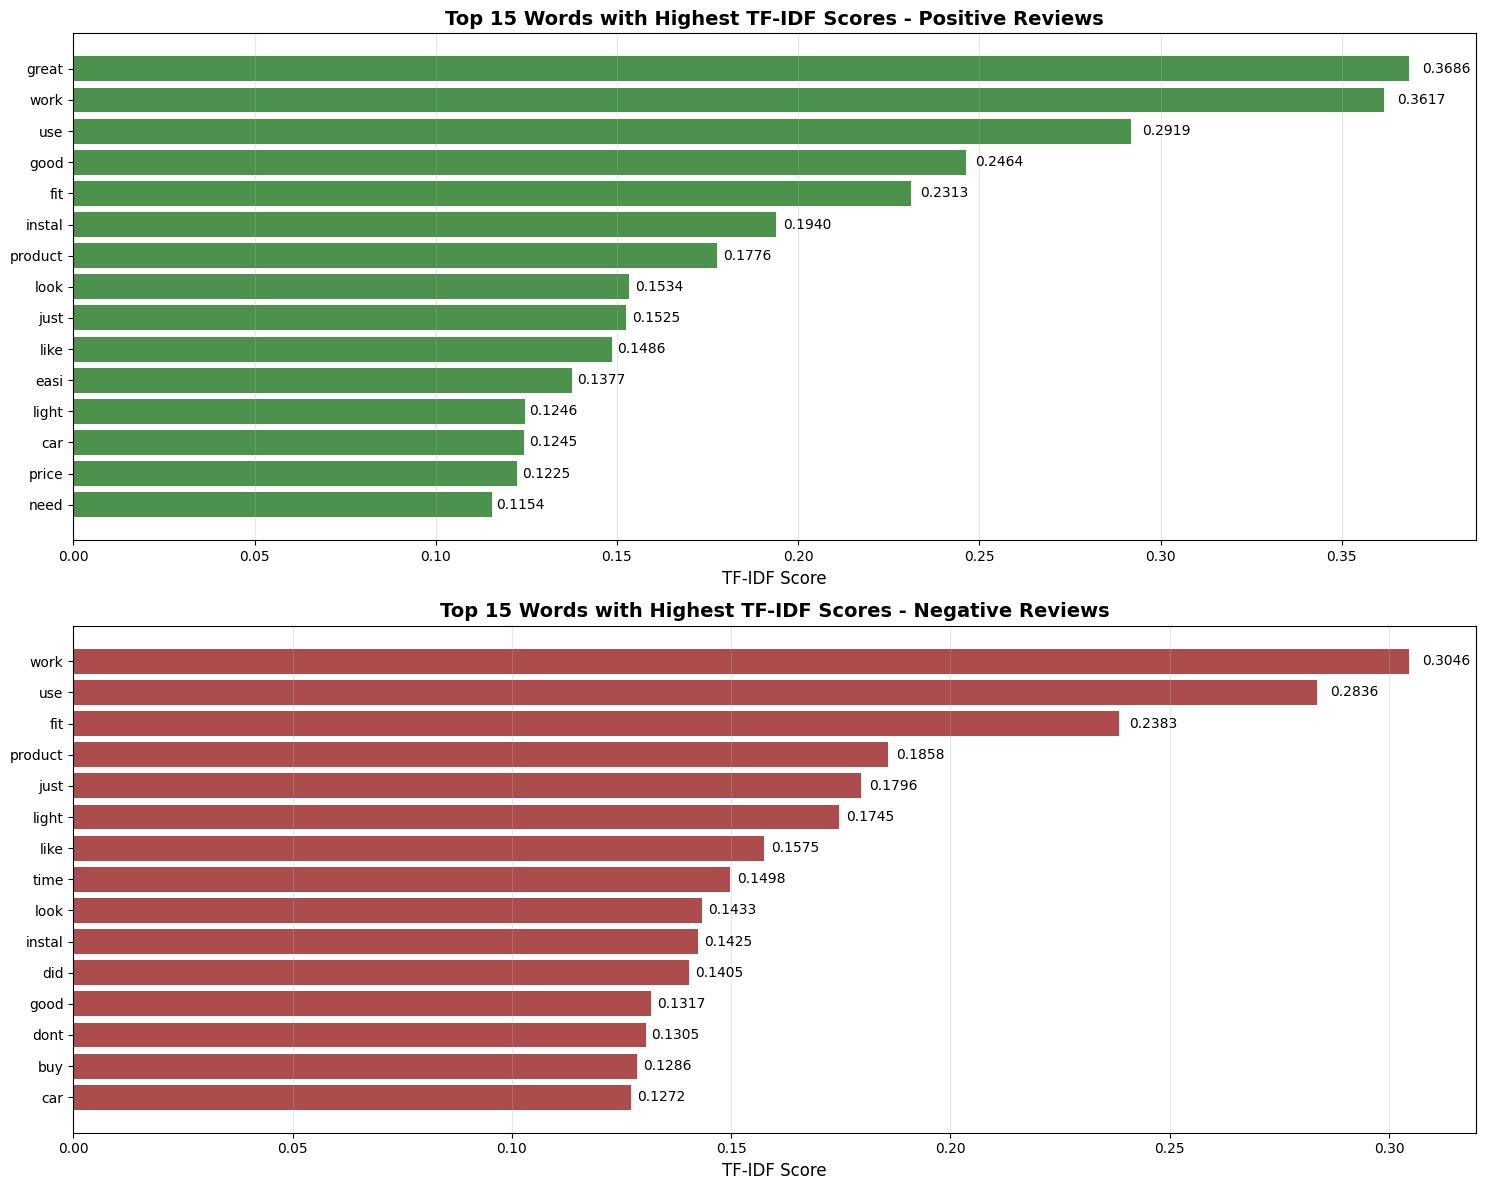

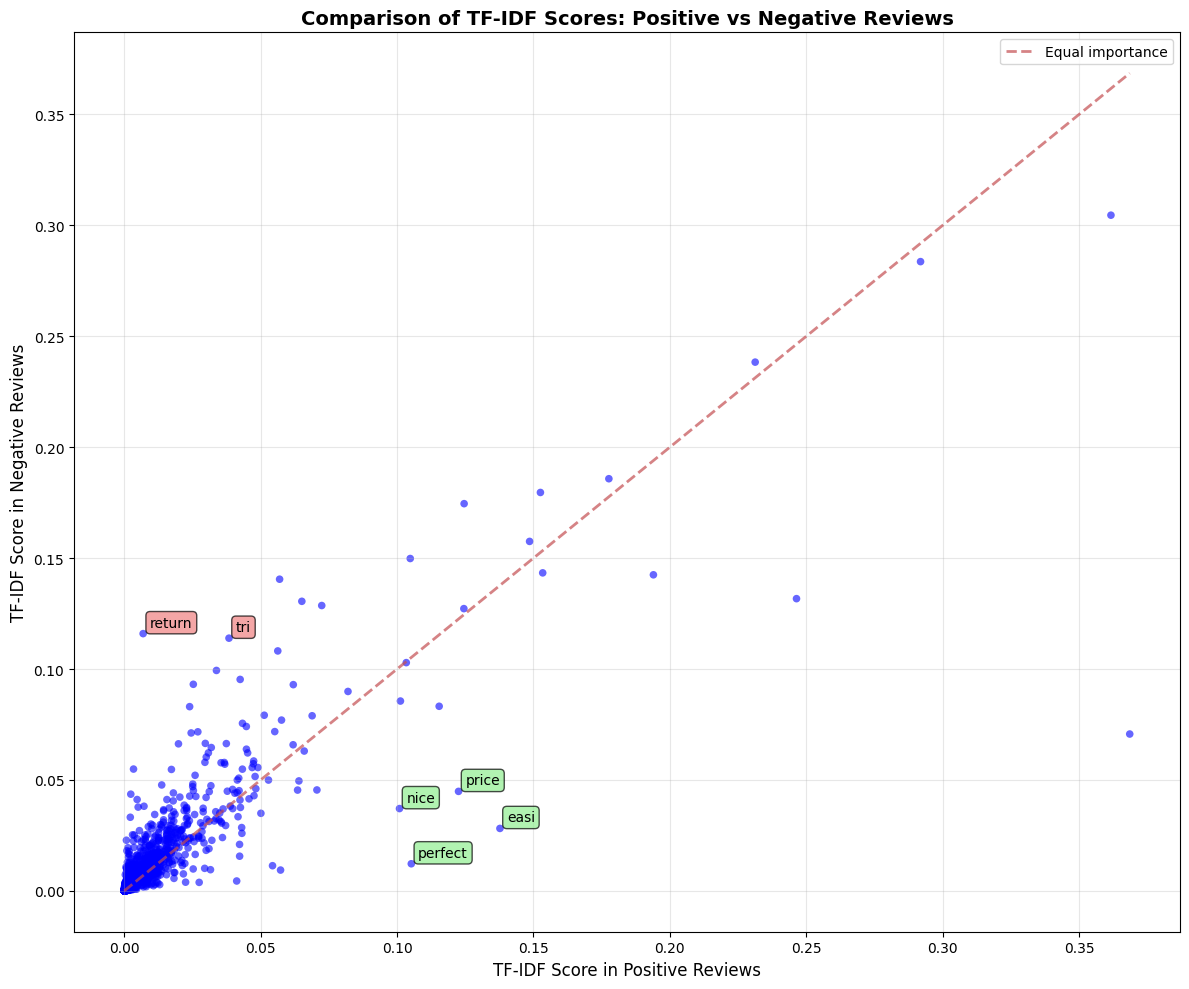

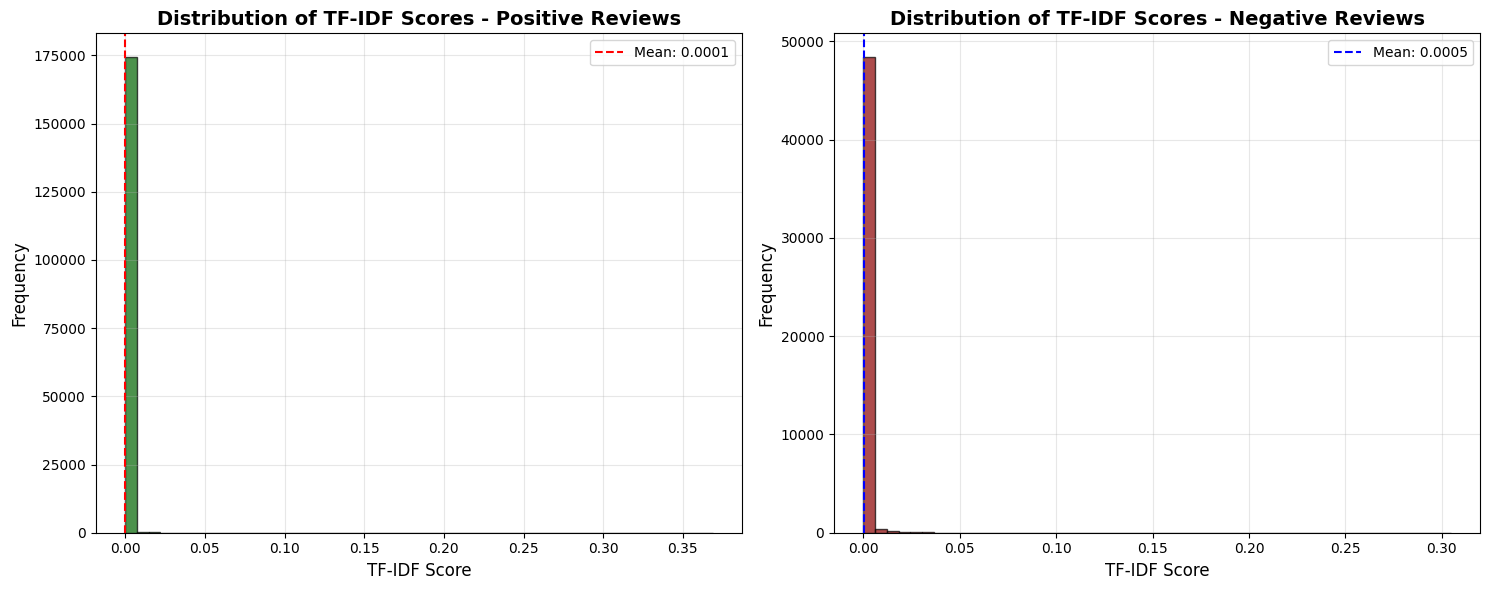


5. Summary of TF-IDF Analysis:
Metric                         Positive        Negative       
Total words                    174839          49111          
Mean TF-IDF (non-zero)         0.000103        0.000451       
Max TF-IDF                     0.368572        0.304575       
Std TF-IDF (non-zero)          0.002389        0.004490       
Words only in this class       145302          19574          


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Create word frequency dictionaries for word clouds
# Use TF-IDF scores as weights for word cloud generation
pos_word_freq = {}
neg_word_freq = {}

for i, word in enumerate(feature_names):
    if tfidf_dense[0, i] > 0:  # Word appears in positive reviews
        pos_word_freq[word] = tfidf_dense[0, i]
    if tfidf_dense[1, i] > 0:  # Word appears in negative reviews
        neg_word_freq[word] = tfidf_dense[1, i]

# Generate word clouds
if pos_word_freq:
    wordcloud_pos = WordCloud(
        width=800, height=400, 
        background_color='white',
        colormap='Greens',
        max_words=200,
        relative_scaling=0.5,
        random_state=42
    ).generate_from_frequencies(pos_word_freq)
    
    ax1.imshow(wordcloud_pos, interpolation='bilinear')
    ax1.set_title('Positive Reviews - TF-IDF Word Cloud', fontsize=16, fontweight='bold')
    ax1.axis('off')

if neg_word_freq:
    wordcloud_neg = WordCloud(
        width=800, height=400, 
        background_color='white',
        colormap='Reds',
        max_words=200,
        relative_scaling=0.5,
        random_state=42
    ).generate_from_frequencies(neg_word_freq)
    
    ax2.imshow(wordcloud_neg, interpolation='bilinear')
    ax2.set_title('Negative Reviews - TF-IDF Word Cloud', fontsize=16, fontweight='bold')
    ax2.axis('off')

plt.tight_layout()
plt.show()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Top positive words
top_n = 15
pos_words = [word for word, score in pos_top_words[:top_n]]
pos_scores = [score for word, score in pos_top_words[:top_n]]

bars1 = ax1.barh(pos_words[::-1], pos_scores[::-1], color='darkgreen', alpha=0.7)
ax1.set_title(f'Top {top_n} Words with Highest TF-IDF Scores - Positive Reviews', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('TF-IDF Score', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=10)

# Top negative words
neg_words = [word for word, score in neg_top_words[:top_n]]
neg_scores = [score for word, score in neg_top_words[:top_n]]

bars2 = ax2.barh(neg_words[::-1], neg_scores[::-1], color='darkred', alpha=0.7)
ax2.set_title(f'Top {top_n} Words with Highest TF-IDF Scores - Negative Reviews', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('TF-IDF Score', fontsize=12)
ax2.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Get all TF-IDF scores for words that appear in both documents
pos_scores_all = tfidf_dense[0, :]
neg_scores_all = tfidf_dense[1, :]

# Create scatter plot
scatter = ax.scatter(pos_scores_all, neg_scores_all, alpha=0.6, s=30, c='blue', edgecolors='none')

# Add diagonal line (words equally important in both classes)
max_score = max(pos_scores_all.max(), neg_scores_all.max())
ax.plot([0, max_score], [0, max_score], 'r--', alpha=0.7, linewidth=2, label='Equal importance')

# Words with high positive TF-IDF but low negative TF-IDF
high_pos_low_neg = []
for i, word in enumerate(feature_names):
    if pos_scores_all[i] > 0.1 and neg_scores_all[i] < 0.05:
        high_pos_low_neg.append((word, pos_scores_all[i], neg_scores_all[i]))

# Sort by positive score and take top 5
high_pos_low_neg.sort(key=lambda x: x[1], reverse=True)
for word, pos_score, neg_score in high_pos_low_neg[:5]:
    ax.annotate(word, (pos_score, neg_score), xytext=(5, 5), 
                textcoords='offset points', fontsize=10, 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7))

# Words with high negative TF-IDF but low positive TF-IDF
high_neg_low_pos = []
for i, word in enumerate(feature_names):
    if neg_scores_all[i] > 0.1 and pos_scores_all[i] < 0.05:
        high_neg_low_pos.append((word, pos_scores_all[i], neg_scores_all[i]))

# Sort by negative score and take top 5
high_neg_low_pos.sort(key=lambda x: x[2], reverse=True)
for word, pos_score, neg_score in high_neg_low_pos[:5]:
    ax.annotate(word, (pos_score, neg_score), xytext=(5, 5), 
                textcoords='offset points', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7))

ax.set_xlabel('TF-IDF Score in Positive Reviews', fontsize=12)
ax.set_ylabel('TF-IDF Score in Negative Reviews', fontsize=12)
ax.set_title('Comparison of TF-IDF Scores: Positive vs Negative Reviews', 
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of positive TF-IDF scores (non-zero only)
pos_nonzero_scores = pos_scores_all[pos_scores_all > 0]
ax1.hist(pos_nonzero_scores, bins=50, color='darkgreen', alpha=0.7, edgecolor='black')
ax1.set_xlabel('TF-IDF Score', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Distribution of TF-IDF Scores - Positive Reviews', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axvline(pos_nonzero_scores.mean(), color='red', linestyle='--', 
            label=f'Mean: {pos_nonzero_scores.mean():.4f}')
ax1.legend()

# Histogram of negative TF-IDF scores (non-zero only)
neg_nonzero_scores = neg_scores_all[neg_scores_all > 0]
ax2.hist(neg_nonzero_scores, bins=50, color='darkred', alpha=0.7, edgecolor='black')
ax2.set_xlabel('TF-IDF Score', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Distribution of TF-IDF Scores - Negative Reviews', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(neg_nonzero_scores.mean(), color='blue', linestyle='--', 
            label=f'Mean: {neg_nonzero_scores.mean():.4f}')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n5. Summary of TF-IDF Analysis:")
print("="*60)
print(f"{'Metric':<30} {'Positive':<15} {'Negative':<15}")
print("="*60)
print(f"{'Total words':<30} {pos_nonzero:<15} {neg_nonzero:<15}")
print(f"{'Mean TF-IDF (non-zero)':<30} {pos_nonzero_scores.mean():<15.6f} {neg_nonzero_scores.mean():<15.6f}")
print(f"{'Max TF-IDF':<30} {pos_scores_all.max():<15.6f} {neg_scores_all.max():<15.6f}")
print(f"{'Std TF-IDF (non-zero)':<30} {pos_nonzero_scores.std():<15.6f} {neg_nonzero_scores.std():<15.6f}")
print(f"{'Words only in this class':<30} {len(pos_only_words):<15} {len(neg_only_words):<15}")
print("="*60)

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



**Submit a PDF with all the charts (the ones you found and the ones you produced).**